In [1]:
import numpy as np
from statsmodels.stats.weightstats import ztest, ttest_ind
from scipy.stats import norm, expon, t
from scipy import mean, std
import matplotlib.pyplot as plt

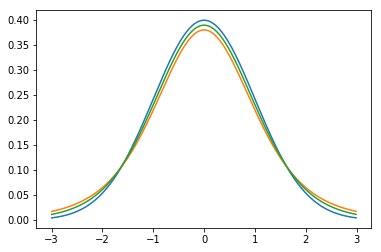

In [2]:
z = np.arange(-3, 3, 0.01)
plt.plot(z, norm.pdf(z)) # blue
plt.plot(z, t(df=5).pdf(z)) # green
plt.plot(z, t(df=10).pdf(z)) # orange
plt.show()

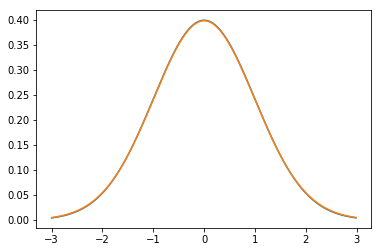

In [3]:
z = np.arange(-3, 3, 0.01)
plt.plot(z, norm.pdf(z))
plt.plot(z, t(df=100).pdf(z))
plt.show()

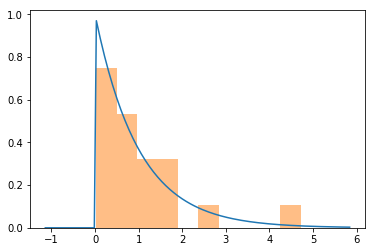

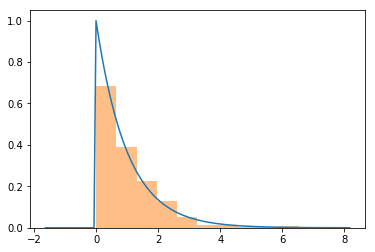

In [4]:
def population_sample_plot(population, sample_size=1000):
    sample = population.rvs(size=sample_size)
    padding = (max(sample) - min(sample)) / 4.0
    resolution = (max(sample) - min(sample)) / 100.0
    z = np.arange(min(sample) - padding, max(sample) + padding, resolution)
    plt.plot(z, population.pdf(z))
    plt.hist(sample, density=True, alpha=0.5)
    plt.show()

population_sample_plot(expon, sample_size=20)
population_sample_plot(expon, sample_size=500)

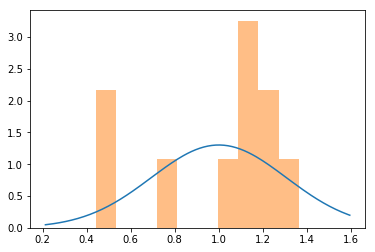

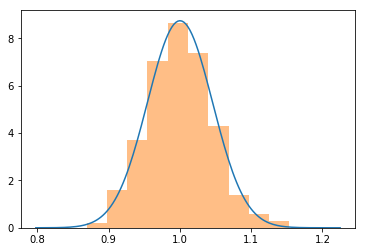

In [5]:
def population_sample_mean_plot(population, sample_size=1000, num_samples=1000):
    sample_means = [mean(population.rvs(size=sample_size)) for _ in range(num_samples)]
    mn = min(sample_means)
    mx = max(sample_means)
    rng = mx - mn
    padding = rng / 4.0
    resolution = rng / 100.0
    z = np.arange(mn - padding, mx + padding, resolution)
    plt.plot(z, norm(mean(sample_means), std(sample_means)).pdf(z))

    plt.hist(sample_means, density=True, alpha=0.5)
    plt.show()
    
population_sample_mean_plot(expon, sample_size=10,  num_samples=10)
population_sample_mean_plot(expon, sample_size=500, num_samples=500)

In [6]:
population_A = expon
population_B = expon
sample_size = 20
sample_A = population_A.rvs(size=sample_size)
sample_B = population_B.rvs(size=sample_size)
t_stat = ttest_ind(sample_A, sample_B, value=0, alternative='larger')
z_stat = ztest(sample_A, sample_B, value=0, alternative='larger')
print('t-score=%.3f, p-value=%.3f' % (t_stat[0], t_stat[1]))
print('z-score=%.3f, p-value=%.3f' % (z_stat[0], z_stat[1]))

t-score=0.057, p-value=0.477
z-score=0.057, p-value=0.477


In [7]:
def simulate_p_values(population_A, population_B, sample_size_A, sample_size_B, num_simulations=100):
    p_diffs = []
    for _ in range(num_simulations):
        sample_A = population_A.rvs(size=sample_size_A)
        sample_B = population_B.rvs(size=sample_size_B)
        t_stat = ttest_ind(sample_A, sample_B, value=0, alternative='larger')
        z_stat = ztest(sample_A, sample_B, value=0, alternative='larger')
        p_diff = abs(z_stat[1] -  t_stat[1])
        p_diffs.append(p_diff)
    return mean(p_diffs), max(p_diffs)

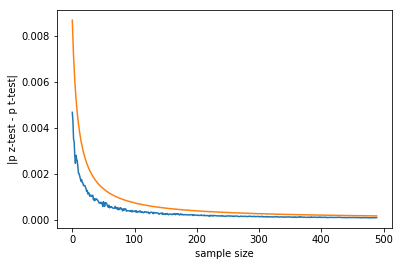

In [8]:
p_diffs = []
for sample_size in range(10, 500):
    p_diff = simulate_p_values(
        population_A=expon,
        population_B=expon,
        sample_size_A=sample_size,
        sample_size_B=sample_size
    )
    p_diffs.append(p_diff)
plt.xlabel('sample size')
plt.ylabel('|p z-test - p t-test|')
plt.plot(p_diffs)
plt.show()

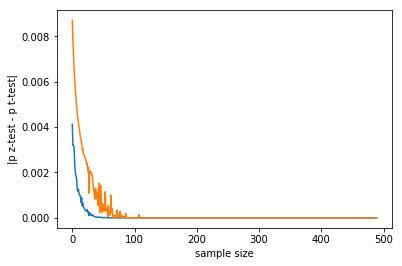

In [9]:
p_diffs = []
for sample_size in range(10, 500):
    p_diff = simulate_p_values(
        population_A=expon(loc=1),
        population_B=expon(loc=2),
        sample_size_A=sample_size,
        sample_size_B=sample_size
    )
    p_diffs.append(p_diff)
plt.xlabel('sample size')
plt.ylabel('|p z-test - p t-test|')
plt.plot(p_diffs)
plt.show()